In [97]:
#Use decision tree to predict survivor on titanic
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns


def read_dataset(fname):
    data = pd.read_csv(fname, index_col = 0)
    
    #process data
    data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace = True)
    data['Sex'] = (data['Sex'] == 'male').astype('int')
    labels = data['Embarked'].unique().tolist()
    data['Embarked'] = data['Embarked'].apply(lambda n: labels.index(n))
    
    data = data.fillna(0)
    return data

train = read_dataset('titanic/train.csv')
    

In [98]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


In [99]:
from sklearn.model_selection import train_test_split
y = train.Survived.values

In [100]:
x = train.drop(['Survived'], axis=1).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print('train dataset: {0}; test dataset: {1}'.format(x_train.shape, x_test.shape))

train dataset: (712L, 7L); test dataset: (179L, 7L)


In [101]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
train_score = clf.score(x_train, y_train)
test_score = clf.score(x_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

train score: 0.988764044944; test score: 0.815642458101


In [102]:
## it's overfitting

## try to select a better depth


def cv_score(depth):
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    cv_score = clf.score(x_test, y_test)
    return train_score, cv_score

In [103]:
depths = range(2, 15)
scores = [cv_score(d) for d in depths]

tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

best_score_index = np.argmax(cv_scores)



In [104]:
best_score = cv_scores[best_score_index]
best_param = depths[best_score_index]
print('best param: {0}; best score: {1}'.format(best_param, best_score))

best param: 8; best score: 0.843575418994


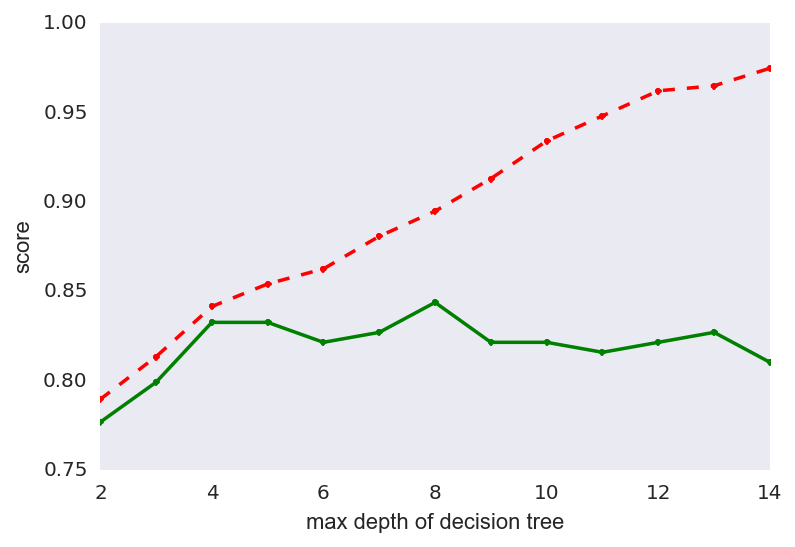

In [105]:
## plot the relationship between depth and scores

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4), dpi = 144)
plt.grid()
plt.xlabel('max depth of decision tree')
plt.ylabel('score')
plt.plot(depths, cv_scores, '.g-', label='cross-validation score')
plt.plot(depths, tr_scores, '.r--', label='training score')



In [106]:
sc = pd.DataFrame(scores, columns=['train score', 'cv score'])
sc['depth'] = depths
sc.head()

,train score,cv score,depth
0,0.789326,0.776536,2
1,0.813202,0.798883,3
2,0.841292,0.832402,4
3,0.853933,0.832402,5
4,0.862360,0.821229,6


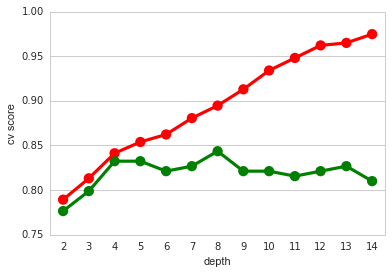

In [111]:
#sns.set()
sns.set_style('whitegrid')
sns.pointplot(x='depth', y='train score', data=sc,color='r')
sns.pointplot(x='depth', y='cv score', data=sc,color='g')

In [112]:
scores

[(0.7893258426966292, 0.77653631284916202),
 (0.8132022471910112, 0.7988826815642458),
 (0.8412921348314607, 0.83240223463687146),
 (0.8539325842696629, 0.83240223463687146),
 (0.86235955056179781, 0.82122905027932958),
 (0.8806179775280899, 0.82681564245810057),
 (0.8946629213483146, 0.84357541899441346),
 (0.9129213483146067, 0.82122905027932958),
 (0.9339887640449438, 0.82122905027932958),
 (0.9480337078651685, 0.81564245810055869),
 (0.9620786516853933, 0.82122905027932958),
 (0.9648876404494382, 0.82681564245810057),
 (0.9747191011235955, 0.81005586592178769)]

In [114]:
depths

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [146]:
# use gini
def cv_score2(val):
    clf = DecisionTreeClassifier(criterion='gini', #'entropy', 
                                 min_impurity_split=val,
                               # min_impurity_decrease=val
                                )
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    cv_score = clf.score(x_test, y_test)
    return train_score, cv_score



In [147]:
values = np.linspace(0, 1, 50)

In [148]:
scores = [cv_score2(v) for v in values]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = values[best_score_index]
print('best param: {0}; best score: {1}'.format(best_param, best_score))


best param: 0.204081632653; best score: 0.849162011173


c:\users\qingshan\miniconda2\envs\dnn\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
c:\users\qingshan\miniconda2\envs\dnn\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
c:\users\qingshan\miniconda2\envs\dnn\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
c:\users\qingshan\miniconda2\envs\dnn\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter ins

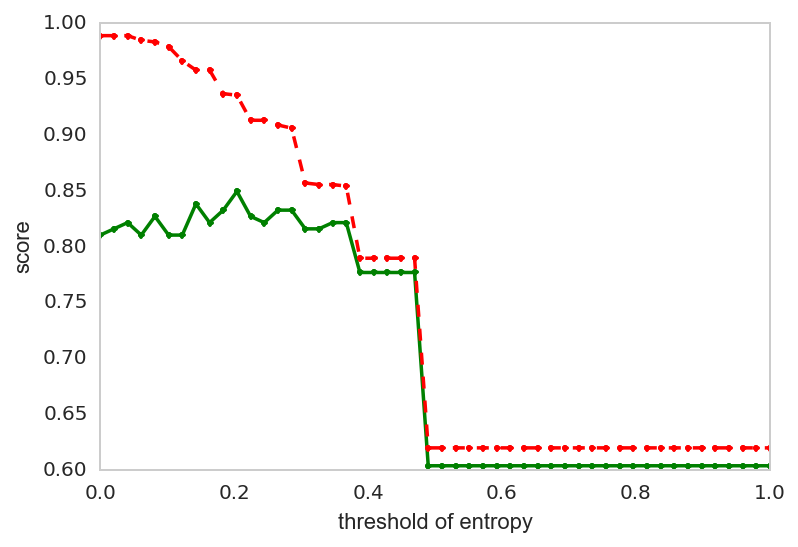

In [149]:

plt.figure(figsize=(6, 4), dpi = 144)
plt.grid()
plt.xlabel('threshold of entropy')
plt.ylabel('score')
plt.plot(values, cv_scores, '.g-', label='cross-validation score')
plt.plot(values, tr_scores, '.r--', label='training score')

In [158]:
# but the model is not stable, everytime it might return different depth
import warnings
warnings.filterwarnings('ignore')

In [159]:
#model param selection
from sklearn.model_selection import GridSearchCV

thresholds = np.linspace(0, 0.5, 50)

param_grid = {'min_impurity_split': thresholds}

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
clf.fit(x, y)
print('best param: {0} \n best score: {1}'.format(clf.best_params_, clf.best_score_))


best param: {'min_impurity_split': 0.2040816326530612} 
 best score: 0.819304152637


In [164]:
def plot_curve(train_sizes, cv_results, xlabel):
    train_scores_mean = cv_results['mean_train_score']
    train_scores_std = cv_results['std_train_score']
    test_scores_mean = cv_results['mean_test_score']
    test_scores_std = cv_results['std_test_score']
    
    plt.figure(figsize=(6,4), dpi = 144)
    plt.title('parameters tuning')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                    train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                    test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, '.g-', label='Train score')
    plt.plot(train_sizes, test_scores_mean, '.r--', label='cv score')   
    plt.legend(loc='best')

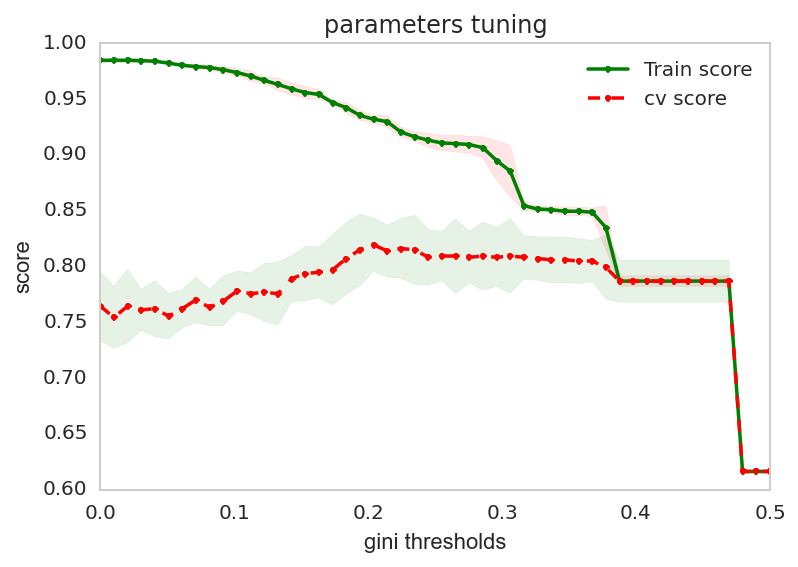

In [165]:
plot_curve(thresholds, clf.cv_results_, xlabel='gini thresholds')

In [168]:
gini_thresholds = np.linspace(0, 0.5, 50)
entropy_thresholds = np.linspace(0, 1, 50)

param_grid = [
    {
        'criterion': ['entropy'],
        'min_impurity_split': entropy_thresholds},
    {
        'criterion': ['gini'],
        'min_impurity_split': gini_thresholds},
    {
        'max_depth': range(2, 10),
        'min_samples_split': range(2, 30, 2)
    }
]

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
clf.fit(x, y)
print('best param: {0} \n best score: {1}'.format(clf.best_params_, clf.best_score_))


best param: {'min_impurity_split': 0.53061224489795911, 'criterion': 'entropy'} 
 best score: 0.829405162738


In [171]:
from sklearn.tree import export_graphviz

clf = DecisionTreeClassifier(criterion='entropy', min_impurity_split=0.53061224489795911)
clf.fit(x_train, y_train)
train_score = clf.score(x_train, y_train)
test_score = clf.score(x_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

with open("titanic.dot", 'w') as f:
    f = export_graphviz(clf, out_file=f)
    

train score: 0.936797752809; test score: 0.821229050279
